In [10]:
import numpy as np 
import torch 
from d3sim.csrc.inliner import INLINER
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [11]:
from d3sim.constants import D3SIM_DEFAULT_DEVICE


cov2d_inv_vec = np.array([0.4, -1, -0.6], np.float32)
res_eigens = torch.zeros([3, 2], dtype=torch.float32, device=D3SIM_DEFAULT_DEVICE)
bound = -1.0
res_corners = torch.zeros([4, 2], dtype=torch.float32, device=D3SIM_DEFAULT_DEVICE)
INLINER.kernel_1d("dev_get_eigen", 1, 0, f"""
namespace op = tv::arrayops;
auto res = Gaussian3D::get_gaussian_2d_ellipse_width_height_vec($cov2d_inv_vec, $bound);
op::reinterpret_cast_array_nd<3, 2>($res_eigens)[0] = res;
auto corners = Gaussian3D::get_gaussian_2d_ellipse_bound_rect_corners($cov2d_inv_vec, $bound);
op::reinterpret_cast_array_nd<4, 2>($res_corners)[0] = corners;
""")
print(res_eigens)

tensor([[ 1.0180,  1.2180],
        [ 0.8660, -0.5352],
        [ 0.6404,  1.0361]], device='cuda:0')


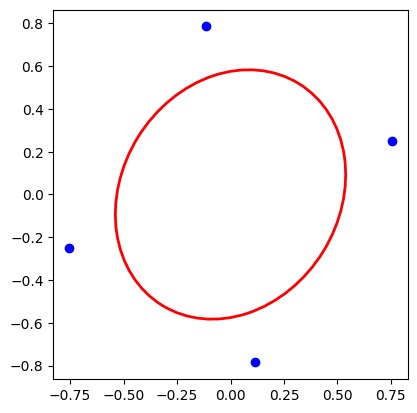

[(0.4329957240024365, -0.26760605332805665), (-0.4329957240024365, 0.26760605332805665)]


In [12]:
res_eigens_np = res_eigens.cpu().numpy()
res_corners_np = res_corners.cpu().numpy()
width = res_eigens_np[0][0]
height = res_eigens_np[0][1]
eigen_vec_x = res_eigens_np[1]
eigen_vec_y = res_eigens_np[2]
anglex = np.arctan2(eigen_vec_x[1], eigen_vec_x[0])

plt.figure()
ax = plt.gca()

ellipse = Ellipse(xy=(0, 0), width=width, height=height, angle=anglex*180/np.pi, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.scatter(res_corners_np[:, 0], res_corners_np[:, 1], c='b')
plt.autoscale()
ax.axes.set_aspect('equal')

plt.show()
print(ellipse.get_co_vertices())

In [20]:
a = np.array([[0.029680, 0.011789], [0.011789, 0.119252]])
1 / (1 * np.sqrt(np.linalg.eig(a)[0]))

array([5.95973611, 2.87744322])

[[-0.64726619 -1.08797981]
 [-0.84596281 -0.971909  ]
 [ 1.25866094  2.174695  ]
 [ 1.05996431  2.29076575]]
[[-1.84596281 -2.08797981]
 [ 2.25866094  3.29076575]]


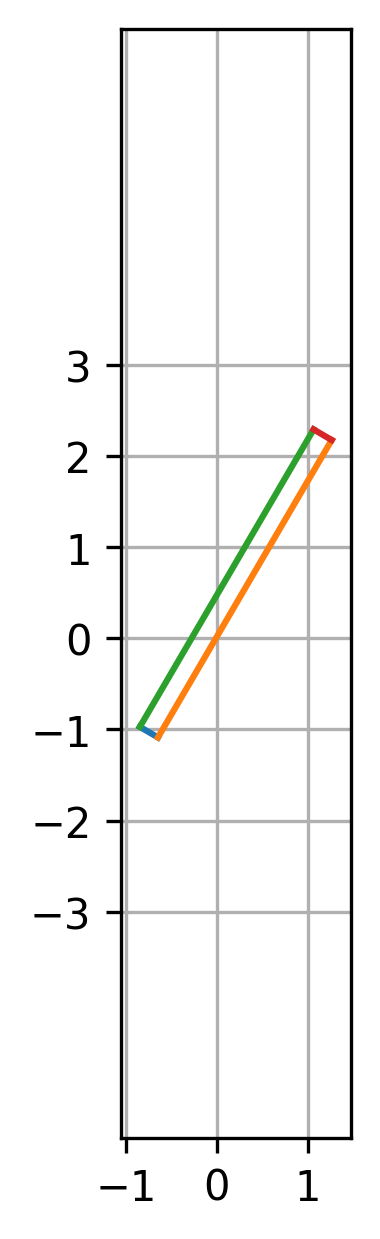

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

corners = np.array([
    -10.356259,-17.407677,-13.535405,-15.550544,20.138575,34.795120,16.959429,36.652252
]).reshape(4, 2) / 16
print(corners)
corners_bound_box = np.array([
    corners.min(axis=0) - 1,
    corners.max(axis=0) + 1
])
print(corners_bound_box)
fig = plt.figure(dpi=300)
ax = fig.gca()
ax.set_xticks(np.arange(np.floor(corners_bound_box[0][0]), corners_bound_box[1][0], 1))
ax.set_yticks(np.arange(np.floor(corners_bound_box[0][1]), corners_bound_box[1][1], 1))
# plt.scatter(corners[:, 0], corners[:, 1])
plt.grid()
plt.plot(corners[[0, 1], 0], corners[[0, 1], 1])
plt.plot(corners[[0, 2], 0], corners[[0, 2], 1], )
plt.plot(corners[[1, 3], 0], corners[[1, 3], 1], )
plt.plot(corners[[2, 3], 0], corners[[2, 3], 1], )

ax.margins(y=1.3, x=.1)

# plt.autoscale()
ax.axes.set_aspect('equal')

plt.show()
